In [185]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [186]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [187]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [188]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [189]:
#Finding number of seasons in total 

season = np.sort(matches['season'].unique())
print("The Number of Seasons in all are",len(season), "which are" , season)

The Number of Seasons in all are 12 which are [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [106]:
#Finding average number of matches played per season

i = 0;
match_no = []
while(i < len(season)):
    match_no.append(len(matches[matches['season'] == season[i]]['id']))
    i = i + 1;
mean = np.mean(match_no)
print("The Average Number of Matches played in all seasons combined", mean)

The Average Number of Matches played in all seasons combined 63.0


In [190]:
#finding the number of teams in all seasons of IPL 

team1 = matches['team1'].unique()
matches = matches.replace("Rising Pune Supergiants", "Rising Pune Supergiant")
print("The total teams that participated in all seasons of IPLs are", len(team1))
matches['team1'].unique()

The total teams that participated in all seasons of IPLs are 15


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

Text(0.5, 1.0, 'Grouped Bar Plot for total matches and wins of Each Team in All Seasons')

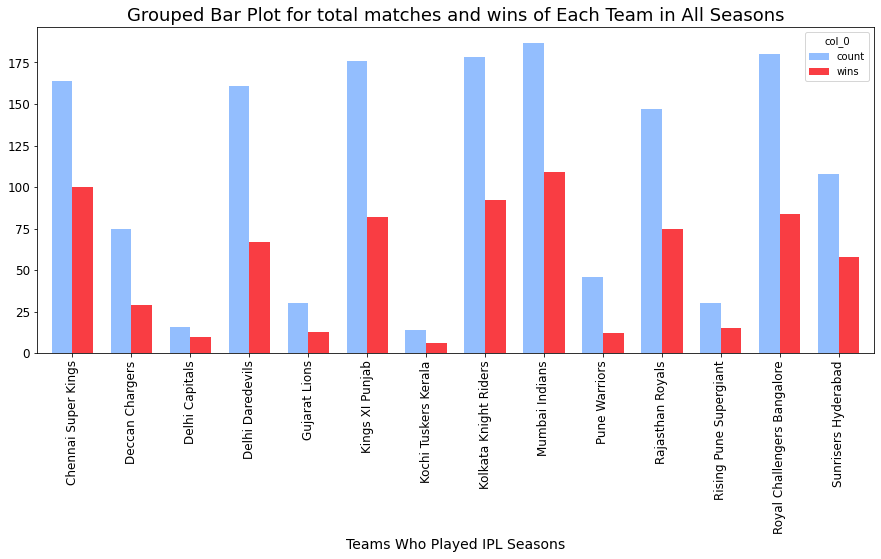

In [108]:
# Finding the number of matches played by each team.

#Finding the unique teams in the IPL Matches
team1 = matches['team1'].unique()

# Finding the number of matches played as team1 and team2 by the teams 
team1_all = pd.crosstab(index = matches['team1'], columns = 'count')
team2_all = pd.crosstab(index = matches['team2'], columns = 'count')

# Adding both the numbers to get the total number of matches
final_team = team1_all.add(team2_all)

# Finding the total matches won by the team
winner = pd.crosstab(index = matches['winner'], columns = "count")
final_team['wins'] = winner['count']
final_team[['count', 'wins']].plot(kind = 'bar' ,  width = 0.7,   color=['#93BEFE' , '#F93D43'],fontsize = 12)
plt.xlabel("Teams Who Played IPL Seasons", fontsize = 14)
plt.title("Grouped Bar Plot for total matches and wins of Each Team in All Seasons", fontsize = 18)


In [191]:
#Calculating the percentage of the wins for all the teams
final_team['percent'] = final_team['wins']/final_team['count'] * 100 
final_team.sort_values(by = 'percent', ascending = False)

col_0,count,wins,percent,seasons
team1,,,,
Delhi Capitals,16,10,62.500000,1
Chennai Super Kings,164,100,60.975610,12
Mumbai Indians,187,109,58.288770,12
Sunrisers Hyderabad,108,58,53.703704,7
Kolkata Knight Riders,178,92,51.685393,12
Rajasthan Royals,147,75,51.020408,12
Rising Pune Supergiant,30,15,50.000000,2
Royal Challengers Bangalore,180,84,46.666667,12
Kings XI Punjab,176,82,46.590909,12


In [192]:
#Calculating the average number of matches played by each team

mean = final_team['count'].mean()
print("The average no. of matches are", mean)
print("The teams who have played less than average matches are" ,sum(final_team['count'] < mean))

The average no. of matches are 108.0
The teams who have played less than average matches are 6


In [193]:
#Calculating average number of wins 
mean_win = final_team['percent'].mean()
print("The average percent win is", mean_win)
print("The teams who have won more than average winning percentage are" ,sum(final_team['percent'] > mean_win))

The average percent win is 48.14217620740895
The teams who have won more than average winning percentage are 7


Text(0, 0.5, 'Teams Playing in IPL in all Seasons')

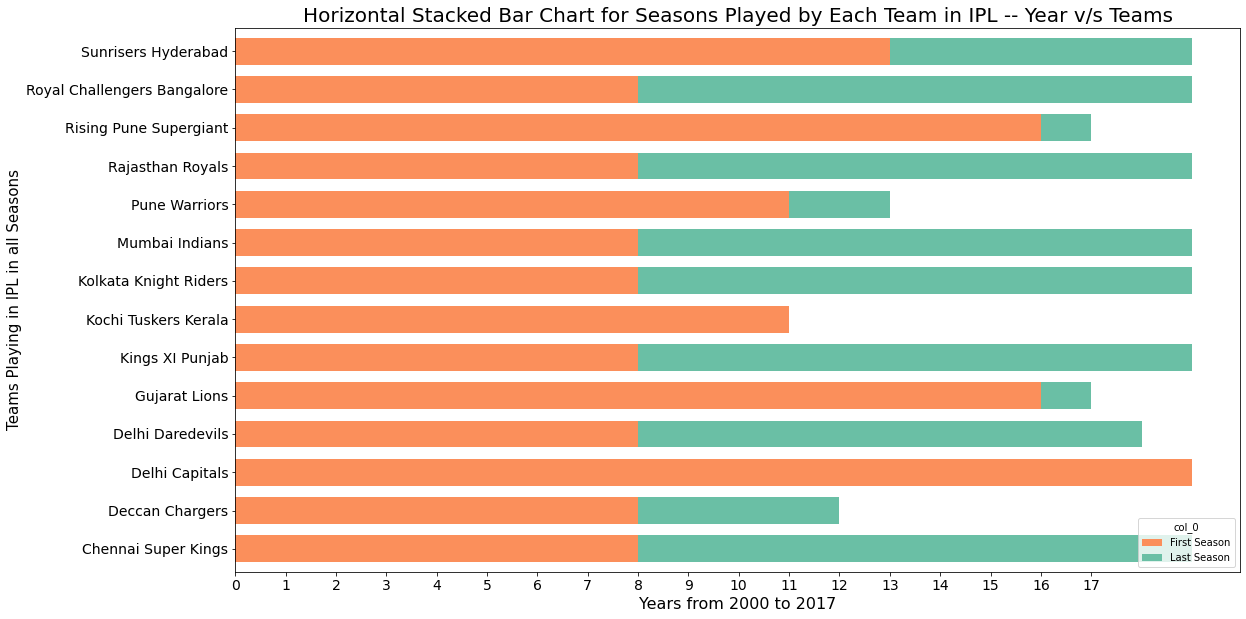

In [194]:
# Determining the first and the last seasons of IPL 
i = 0;
team_order = np.sort(matches['team1'].unique())
array = []
first = []
last = []
while i < 14:
    array = np.sort(list(matches[matches['team1'] == team_order[i]]['season'].unique()))
    first.append(array[0] % 2000)
    last.append(array[len(array)-1] - array[0])
    i = i +1
final_team['First Season']= first
final_team['Last Season'] = last
final_team['seasons'] = [x+1 for x in last]
plt.rcParams["figure.figsize"][0] = 18
plt.rcParams["figure.figsize"][1] = 10
final_team[['First Season' , 'Last Season']].plot(kind = 'barh', stacked = True, rot = 0, xticks = np.arange(0,18,1),
                                                  fontsize = 14,width = 0.7,   color=['#FB8F5B' , '#6ABFA5']) 
plt.title('Horizontal Stacked Bar Chart for Seasons Played by Each Team in IPL -- Year v/s Teams', fontsize = 20)
plt.xlabel("Years from 2000 to 2017", fontsize = 16)
plt.ylabel("Teams Playing in IPL in all Seasons", fontsize  = 15)

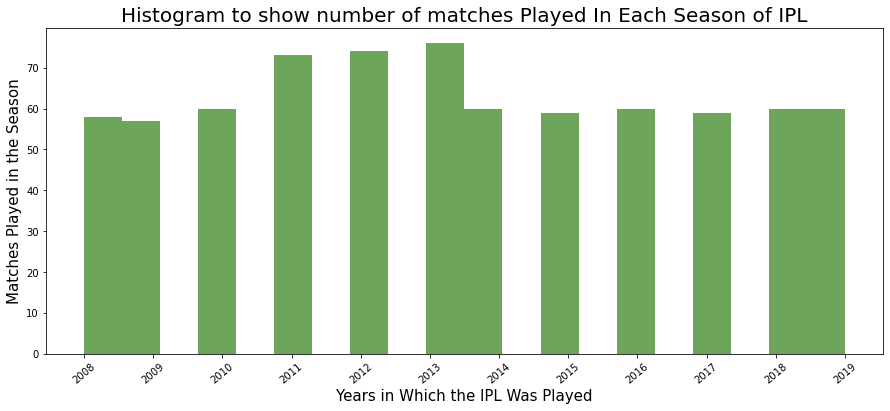

In [184]:
# Plotting a Histogram to get the number of seasons and no. of matches played in each season. 

plt.rcParams["figure.figsize"][0] = 15
plt.rcParams["figure.figsize"][1] = 6
matches['season'].hist(color = '#6DA65A',bins = 20,  grid = False)
plt.title("Histogram to show number of matches Played In Each Season of IPL",fontsize = 20)
plt.xlabel("Years in Which the IPL Was Played", fontsize = 15)
plt.ylabel("Matches Played in the Season", fontsize = 15)
plt.xticks(np.arange(2008,2020, step = 1), rotation=40)
plt.show()

In [113]:
final_team = final_team.drop(columns = ['First Season' , 'Last Season'])
final_team.sort_values(['seasons', 'percent'], ascending = [False, False])

col_0,count,wins,percent,seasons
team1,,,,
Chennai Super Kings,164,100,60.975610,12
Mumbai Indians,187,109,58.288770,12
Kolkata Knight Riders,178,92,51.685393,12
Rajasthan Royals,147,75,51.020408,12
Royal Challengers Bangalore,180,84,46.666667,12
Kings XI Punjab,176,82,46.590909,12
Delhi Daredevils,161,67,41.614907,11
Sunrisers Hyderabad,108,58,53.703704,7
Deccan Chargers,75,29,38.666667,5


In [195]:
#Finding the Cities in which matches were played 
null = matches.isnull()
print("The entries which have no cities mentioned are" , sum(null['city']))
print(matches[null['city'] == True]['id'])
# Removing all these matches by these specific indices
matches_clean = matches.drop(matches.index[[461,462,466,468,469,474,476]])

The entries which have no cities mentioned are 7
461    462
462    463
466    467
468    469
469    470
474    475
476    477
Name: id, dtype: int64


In [115]:
final_team_city = final_team[final_team['count'] > 70]
final_team_city = final_team_city.sort_values(by = 'count', ascending = False)
cities = pd.crosstab(index = matches_clean['city'], columns = 'count').sort_values(by = 'count', ascending = False)
cities_analyse = cities[cities['count'] > 40]

In [196]:
#Finding the cities in Which MUMBAI INDIANS WON for PIE CHART 1
matcheswin = matches_clean[matches_clean['winner'] == "Mumbai Indians"]
winner_MI = pd.crosstab(index = matcheswin['city'],columns= 'count' )
winner_MI = winner_MI[winner_MI['count'] > 2].sort_values(by = 'count' , ascending = False)

#Finding the cities in Which RCB WON -- PIE CHART 1
matcheswin2 = matches_clean[matches_clean['winner'] == "Royal Challengers Bangalore"]
winner_RCB = pd.crosstab(index = matcheswin2['city'],columns= 'count' )
winner_RCB = winner_RCB[winner_RCB['count'] > 3].sort_values(by = 'count' , ascending = False)

#Finding the cities in Which CSK WON -- PIE CHART 1
matcheswin3 = matches_clean[matches_clean['winner'] == "Chennai Super Kings"]
winner_CSK = pd.crosstab(index = matcheswin3['city'],columns= 'count' )
winner_CSK = winner_CSK[winner_CSK['count'] > 2].sort_values(by = 'count' , ascending = False)

#Finding the cities in Which DD WON -- PIE CHART 1
matcheswin4 = matches_clean[matches_clean['winner'] == "Delhi Daredevils"]
winner_DD = pd.crosstab(index = matcheswin4['city'],columns= 'count' )
winner_DD = winner_DD[winner_DD['count'] > 2].sort_values(by = 'count' , ascending = False)

#Finding the cities in Which KKR WON -- PIE CHART 1
matcheswin5 = matches_clean[matches_clean['winner'] == "Kolkata Knight Riders"]
winner_KKR = pd.crosstab(index = matcheswin5['city'],columns= 'count' )
winner_KKR = winner_KKR[winner_KKR['count'] > 2].sort_values(by = 'count' , ascending = False)

#Finding the cities in Which KIP WON -- PIE CHART 1
matcheswin6 = matches_clean[matches_clean['winner'] == "Kings XI Punjab"]
winner_KIP = pd.crosstab(index = matcheswin6['city'],columns= 'count' )
winner_KIP = winner_KIP[winner_KIP['count'] > 3].sort_values(by = 'count' , ascending = False)

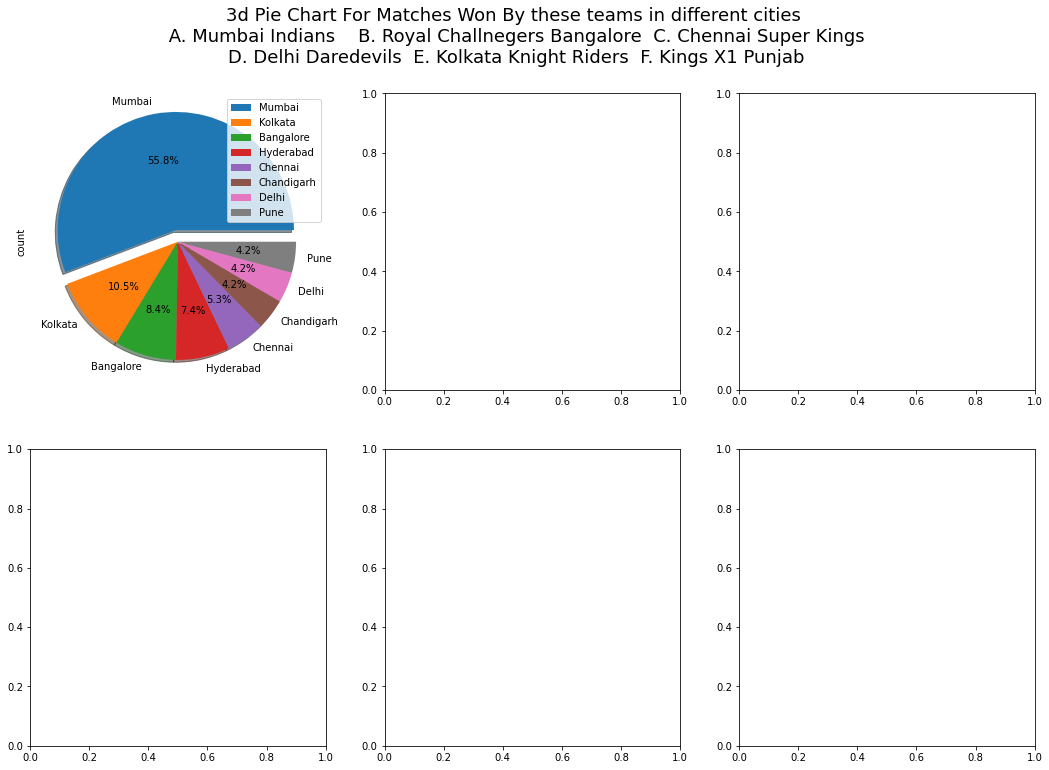

In [197]:
plt.rcParams["figure.figsize"][0] = 18
plt.rcParams["figure.figsize"][1] = 12
fig, axs = plt.subplots(2,3)
plt.suptitle("3d Pie Chart For Matches Won By these teams in different cities \n "
             "A. Mumbai Indians    B. Royal Challnegers Bangalore  C. Chennai Super Kings \n"
             "D. Delhi Daredevils  E. Kolkata Knight Riders  F. Kings X1 Punjab", fontsize = 18)
explode1 = (0.1, 0, 0 , 0 , 0 ,0 , 0 , 0)
explode2 = (0.1,0,0,0)
explode3 = (0.1, 0 , 0 , 0 ,0 , 0 , 0 )
explode4 = (0.1, 0,0,0,0,0)
winner_MI.plot(kind = 'pie' , subplots = True, ax=axs[0][0], explode = explode1,  autopct='%1.1f%%',shadow=True)

plt.show()

In [198]:
# Finding the matches played in Mumbai City FOR PIE CHART 2
matches_city1 = matches[matches['city'] == "Mumbai"]
# Finding the number of matches played as team1 and team2 by the teams 
team1_mumbai = pd.crosstab(index = matches_city1['team1'], columns = 'count')
team2_mumbai = pd.crosstab(index = matches_city1['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
team_city1 = team1_mumbai.add(team2_mumbai)
team_city1 = team_city1[team_city1['count'] > 5]

# Finding the matches played in Bangalore City -- PIE CHART 2
matches_city2 = matches[matches['city'] == "Bangalore"]
# Finding the number of matches played as team1 and team2 by the teams 
team1_bangalore = pd.crosstab(index = matches_city2['team1'], columns = 'count')
team2_bangalore = pd.crosstab(index = matches_city2['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
team_city2 = team1_bangalore.add(team2_bangalore)
team_city2 = team_city2[team_city2['count'] > 5]

# Finding the matches played in Chennai City -- PIE CHART 2
matches_city3 = matches[matches['city'] == "Chennai"]
# Finding the number of matches played as team1 and team2 by the teams 
team1_chennai = pd.crosstab(index = matches_city3['team1'], columns = 'count')
team2_chennai = pd.crosstab(index = matches_city3['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
team_city3 = team1_chennai.add(team2_chennai)
team_city3 = team_city3[team_city3['count'] > 5]

# Finding the matches played in Delhi City -- PIE CHART 2
matches_city4 = matches[matches['city'] == "Delhi"]
# Finding the number of matches played as team1 and team2 by the teams 
team1_delhi = pd.crosstab(index = matches_city4['team1'], columns = 'count')
team2_delhi = pd.crosstab(index = matches_city4['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
team_city4 = team1_delhi.add(team2_delhi)
team_city4 = team_city4[team_city4['count'] > 5]

# Finding the matches played in Kolkata City -- PIE CHART 2
matches_city5 = matches[matches['city'] == "Kolkata"]
# Finding the number of matches played as team1 and team2 by the teams 
team1_kolkata = pd.crosstab(index = matches_city5['team1'], columns = 'count')
team2_kolkata = pd.crosstab(index = matches_city5['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
team_city5 = team1_kolkata.add(team2_kolkata)
team_city5 = team_city5[team_city5['count'] > 5]

## Finding the matches played in Chandigarh City -- PIE CHART 2
matches_city6 = matches[matches['city'] == "Chandigarh"]
# Finding the number of matches played as team1 and team2 by the teams 
team1_chandigarh = pd.crosstab(index = matches_city6['team1'], columns = 'count')
team2_chandigarh = pd.crosstab(index = matches_city6['team2'], columns = 'count')
# Adding both the numbers to get the total number of matches
team_city6 = team1_chandigarh.add(team2_chandigarh)
team_city6 = team_city6[team_city6['count'] > 5]

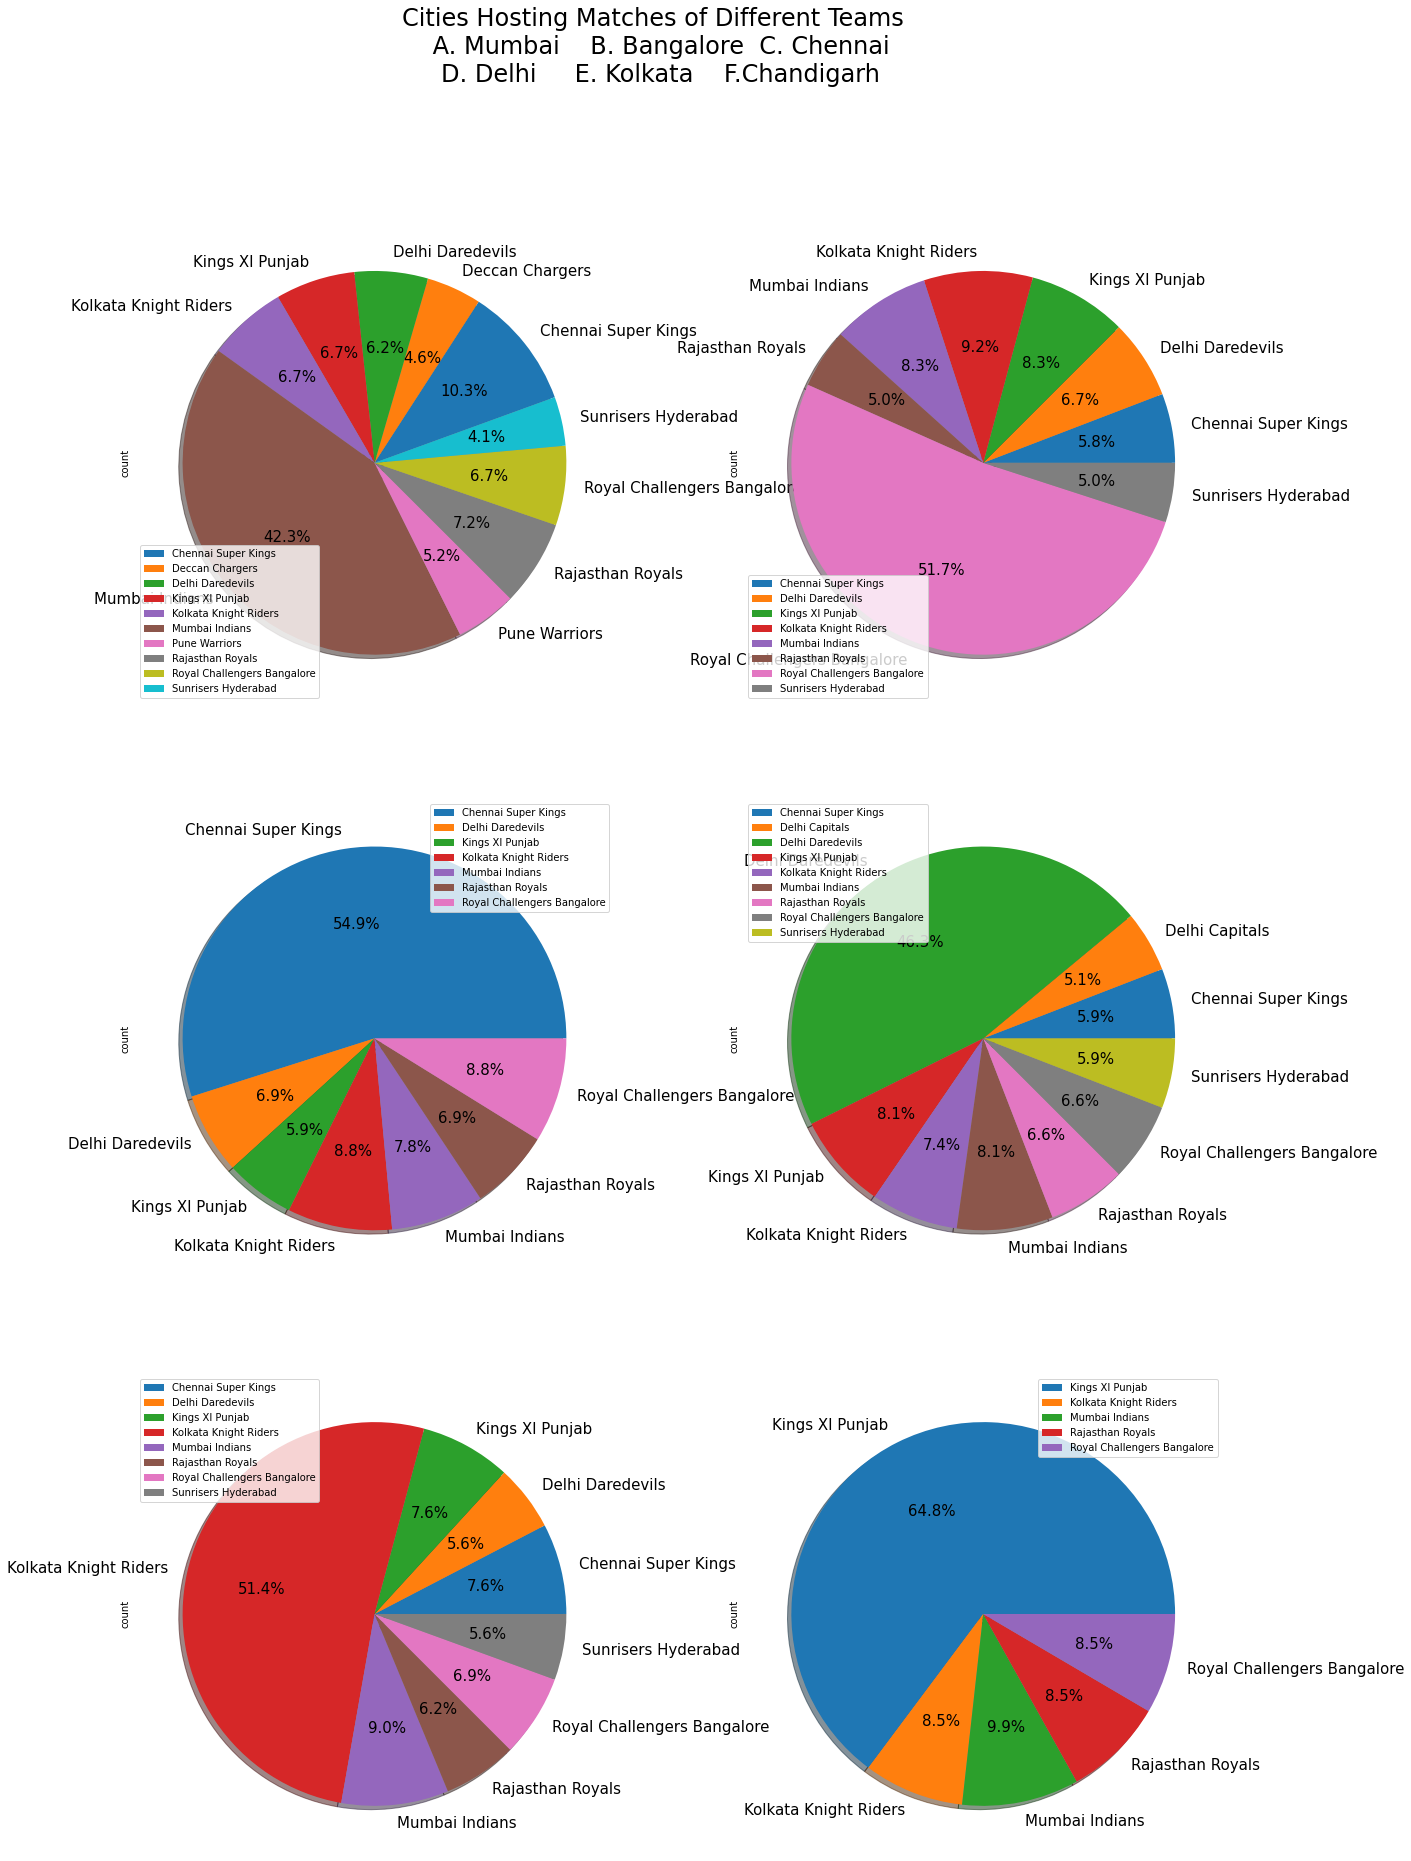

In [119]:
plt.rcParams["figure.figsize"][0] = 20
plt.rcParams["figure.figsize"][1] = 30
fig, axs = plt.subplots(3,2)
plt.suptitle("Cities Hosting Matches of Different Teams  \n "
             "A. Mumbai    B. Bangalore  C. Chennai \n"
             "D. Delhi     E. Kolkata    F.Chandigarh", fontsize = 24)
team_city1.plot(kind = 'pie' , subplots = True, ax = axs[0][0],  autopct = "%1.1f%%", shadow= True, startangle=20, fontsize = 15)
team_city2.plot(kind = 'pie' , subplots = True, ax = axs[0][1],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
team_city3.plot(kind = 'pie' , subplots = True, ax = axs[1][0],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
team_city4.plot(kind = 'pie' , subplots = True, ax = axs[1][1],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
team_city5.plot(kind = 'pie' , subplots = True, ax = axs[2][0],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
team_city6.plot(kind = 'pie' , subplots = True, ax = axs[2][1],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
plt.show()

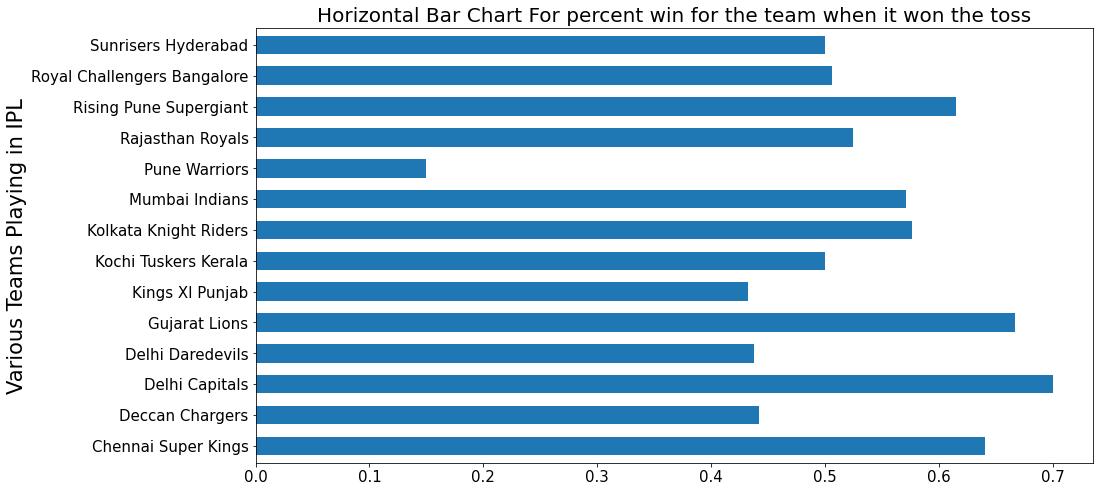

In [199]:
win_game = matches[matches['toss_winner'] == matches['winner']]
toss_win = pd.crosstab(index = win_game['winner'], columns = 'count')
toss_all = pd.crosstab(index = matches['toss_winner'], columns = 'count')
toss_all['won_match'] = toss_win['count']
toss_all['percent'] = toss_win['count'] / toss_all['count']
plt.rcParams["figure.figsize"][0] = 15
plt.rcParams["figure.figsize"][1] = 8
toss_all['percent'].plot(kind = 'barh', width = 0.6, fontsize = 15)
plt.ylabel("Various Teams Playing in IPL", fontsize =21)
plt.title("Horizontal Bar Chart For percent win for the team when it won the toss" , fontsize = 20)
plt.show()

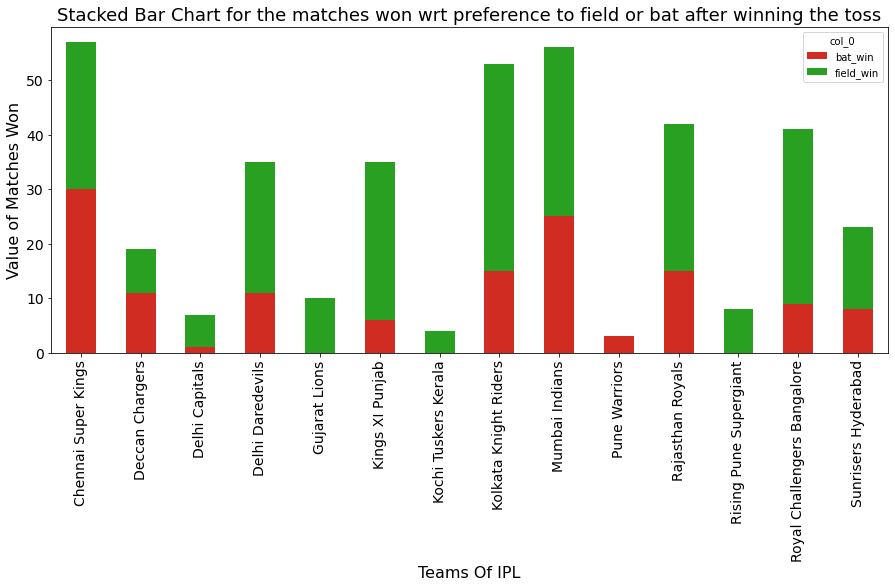

In [200]:
win_game.head(4)
field_win = win_game[win_game['toss_decision'] == 'field']
bat_win = win_game[win_game['toss_decision'] == 'bat']
bat = pd.crosstab(index = bat_win['winner'] , columns = 'count')
field = pd.crosstab(index = field_win['winner'], columns = 'count')
toss_all['bat_win'] = bat['count']
toss_all['field_win'] = field['count']
plt.rcParams["figure.figsize"][0] = 15
plt.rcParams["figure.figsize"][1] = 6
toss_all[['bat_win', 'field_win']].plot(kind = 'bar', stacked = True, fontsize = 14, color = ['#D12C22', '#2AA023'])
plt.title("Stacked Bar Chart for the matches won wrt preference to field or bat after winning the toss", fontsize = 18)
plt.ylabel("Value of Matches Won", fontsize = 16)
plt.xlabel("Teams Of IPL", fontsize = 16)
plt.show()

In [122]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


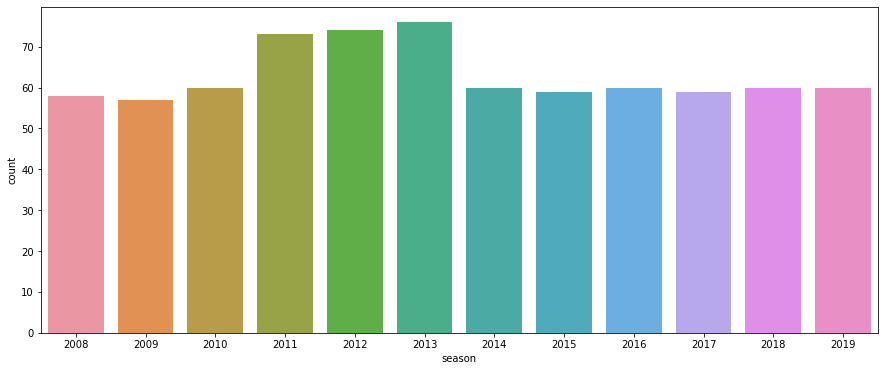

In [201]:
sb.countplot(x = 'season', data = matches)
plt.show()

Text(0.5, 1.0, 'Doughnut Chart for top 15 Cricketers who have been Man of the Matches')

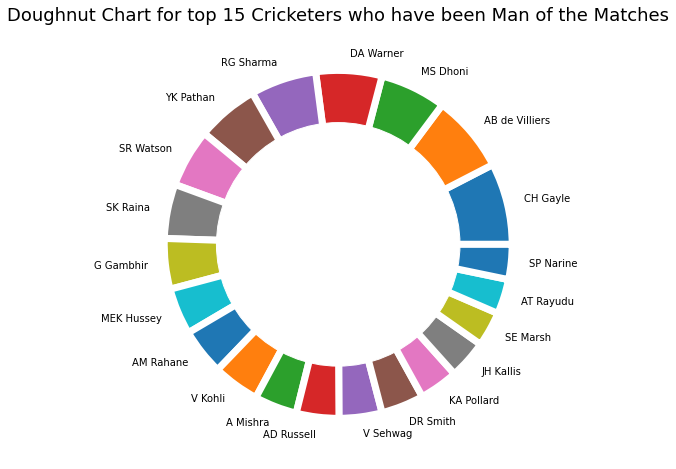

In [202]:
#Finding the count of each player being the man of the match and selecting top 15 to plot the chart
player = matches['player_of_match']
from collections import Counter
count = Counter(player).values()
list1 = pd.DataFrame({'Player' :matches['player_of_match'].unique()})
list1['count'] = count
list1 = list1[list1['count'] > 8].sort_values(by = 'count', ascending = False)
#plotting the Doughnut Chart 
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 8
plt.pie(list1['count'], labels = list1['Player'], wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white'})
my_circle = plt.Circle(( 0,0) , 0.7 , color = 'White')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Doughnut Chart for top 15 Cricketers who have been Man of the Matches", fontsize= 18)

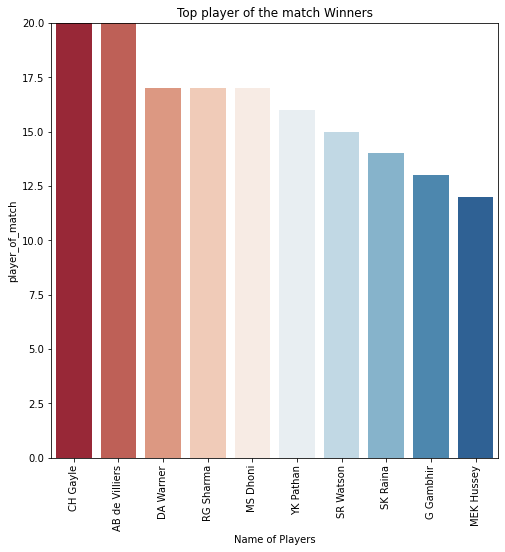

In [125]:
top_players = matches.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Number of Awards")
ax.set_xlabel("Name of Players")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sb.barplot(x = top_players.index, y = top_players, orient='v', palette="RdBu");
plt.xticks(rotation = 'vertical')
plt.show()

In [126]:
## BATSMEN DATA GROUPED BY MATCH
# Here the data is grouped to provide deeper depth of statistics and later for the team classificaiton

batsman_grp = deliveries.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()

# Ignore the wide balls.
balls_faced = deliveries[deliveries["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

fours = deliveries[ deliveries["batsman_runs"] == 4]
sixes = deliveries[ deliveries["batsman_runs"] == 6]

fours_per_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

fours_per_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns = ["match_id", "inning", "batsman", "6s"]

batsmen = batsmen.merge(fours_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

for col in ["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col] = batsmen[col].fillna(0)

dismissals = deliveries[ pd.notnull(deliveries["player_dismissed"])]
dismissals = dismissals[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]
dismissals.rename(columns={"player_dismissed": "batsman"}, inplace=True)
batsmen = batsmen.merge(dismissals, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

batsmen = matches[['id','season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsmen.head(10)

,season,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,0.0,2.0,266.67,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0,175.00,caught,Mandeep Singh
2,2017,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0,0.0,1.0,133.33,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0,3.0,2.0,140.54,caught,Sachin Baby
4,2017,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0,5.0,0.0,129.03,caught,Sachin Baby
5,2017,1,1,Sunrisers Hyderabad,Yuvraj Singh,62,27.0,7.0,3.0,229.63,bowled,NaN
6,2017,1,2,Royal Challengers Bangalore,A Choudhary,6,2.0,0.0,1.0,300.00,NaN,NaN
7,2017,1,2,Royal Challengers Bangalore,CH Gayle,32,21.0,2.0,3.0,152.38,caught,DA Warner
8,2017,1,2,Royal Challengers Bangalore,KM Jadhav,31,16.0,4.0,1.0,193.75,run out,BCJ Cutting
9,2017,1,2,Royal Challengers Bangalore,Mandeep Singh,24,16.0,5.0,0.0,150.00,bowled,NaN


In [127]:
# Data is grouped for bowlers to provide greater depth of information. Very important for the regression analysis.

bowler_grp = deliveries.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])
bowlers = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()

bowlers["runs"] = bowlers["total_runs"] - (bowlers["bye_runs"] + bowlers["legbye_runs"])
bowlers["extras"] = bowlers["wide_runs"] + bowlers["noball_runs"]

del( bowlers["bye_runs"])
del( bowlers["legbye_runs"])
del( bowlers["total_runs"])

dismissal_kinds_for_bowler = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
dismissals = deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds_for_bowler)]
dismissals = dismissals.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])["dismissal_kind"].count().reset_index()
dismissals.rename(columns={"dismissal_kind": "wickets"}, inplace=True)

bowlers = bowlers.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"], 
                        right_on=["match_id", "inning", "bowling_team", "bowler", "over"], how="left")
bowlers["wickets"] = bowlers["wickets"].fillna(0)

bowlers_over = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler'])['over'].count().reset_index()
bowlers = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler']).sum().reset_index().drop('over', 1)
bowlers = bowlers_over.merge(bowlers, on=["match_id", "inning", "bowling_team", "bowler"], how = 'left')
bowlers['Econ'] = np.round(bowlers['runs'] / bowlers['over'] , 2)
bowlers = matches[['id','season']].merge(bowlers, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

bowlers.head(10)

<ipython-input-127-d8faef0f6cd5>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bowlers = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()


,season,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,runs,extras,wickets,Econ
0,2017,1,1,Royal Challengers Bangalore,A Choudhary,4,3,1,55,4,1.0,13.75
1,2017,1,1,Royal Challengers Bangalore,S Aravind,3,0,0,36,0,0.0,12.00
2,2017,1,1,Royal Challengers Bangalore,SR Watson,3,0,0,41,0,0.0,13.67
3,2017,1,1,Royal Challengers Bangalore,STR Binny,1,0,0,10,0,1.0,10.00
4,2017,1,1,Royal Challengers Bangalore,TM Head,1,0,0,11,0,0.0,11.00
5,2017,1,1,Royal Challengers Bangalore,TS Mills,4,2,0,31,2,1.0,7.75
6,2017,1,1,Royal Challengers Bangalore,YS Chahal,4,0,0,22,0,1.0,5.50
7,2017,1,2,Sunrisers Hyderabad,A Nehra,4,1,0,42,1,2.0,10.50
8,2017,1,2,Sunrisers Hyderabad,B Kumar,4,1,0,27,1,2.0,6.75
9,2017,1,2,Sunrisers Hyderabad,BCJ Cutting,4,2,0,35,2,0.0,8.75


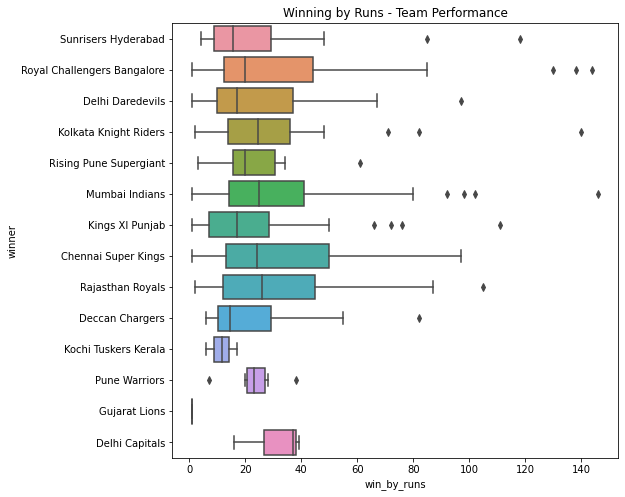

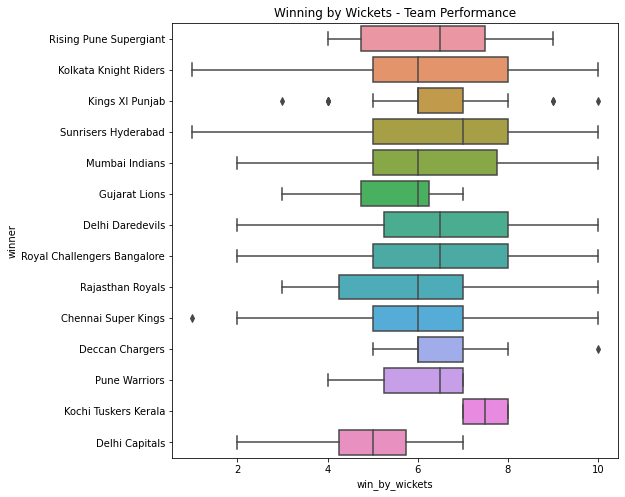

In [128]:
## Barplot of Runs

#sb.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
#fig.figsize = [16,10]
#ax.set_ylim([0,20])
ax.set_xlabel("Runs")
ax.set_title("Winning by Runs - Team Performance")
#top_players.plot.bar()
sb.boxplot(y = 'winner', x = 'win_by_runs', data=matches[matches['win_by_runs']>0], orient = 'h'); #palette="Blues");
plt.show()

## Barplot of Wickets Win

#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
#fig.figsize = [16,10]
#ax.set_ylim([0,20])
ax.set_title("Winning by Wickets - Team Performance")
#top_players.plot.bar()
sb.boxplot(y = 'winner', x = 'win_by_wickets', data=matches[matches['win_by_wickets']>0], orient = 'h'); #palette="Blues");
plt.show()

In [129]:
#WINNER PREDICTION

matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [130]:
matches['winner'].fillna('Draw', inplace=True)

In [131]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [132]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [133]:
#remove any null values, winner has hence fill the null value in winner as draw
#City is also null
matches['city'].fillna('Dubai',inplace=True)
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [134]:
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
MI


In [135]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11


In [136]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,city,toss_decision,toss_winner,venue,winner
count,756,756,756,756,756,756,756
unique,14,14,33,2,14,41,15
top,1,2,Mumbai,field,1,Eden Gardens,1
freq,101,95,101,463,98,77,109


In [137]:
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 98
KKR -> 92
CSK -> 89
RCB -> 81
KXIP -> 81
RR -> 80
DD -> 80
SRH -> 46
DC -> 43
PW -> 20
GL -> 15
RPS -> 13


ValueError: 'Delhi Capitals' is not in list

Text(0.5, 1.0, 'Match winners')

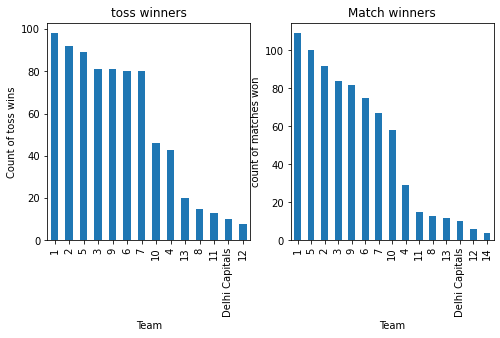

In [138]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [139]:
df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [140]:
#Find cities which are null
df[pd.isnull(df['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [141]:
#building predictive model
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

team1            object
team2            object
city              int32
toss_decision     int32
toss_winner      object
venue             int32
winner           object
dtype: object

In [142]:
# PREDCITION

In [143]:
points2008 = pd.read_csv('IPL 2008 PT.csv')
points2009 = pd.read_csv('IPL 2009 PT.csv')
points2010 = pd.read_csv('IPL 2010 PT.csv')
points2011 = pd.read_csv('IPL 2011 PT.csv')
points2012 = pd.read_csv('IPL 2012 PT.csv')
points2013 = pd.read_csv('IPL 2013 PT.csv')
points2014 = pd.read_csv('IPL 2014 PT.csv')
points2015 = pd.read_csv('IPL 2015 PT.csv')
points2016 = pd.read_csv('IPL 2016 PT.csv')
points2017 = pd.read_csv('IPL 2017 PT.csv')
points2018 = pd.read_csv('IPL 2018 PT.csv')
points2019 = pd.read_csv('IPL 2019 PT.csv')

In [144]:
points2019

,Team,Pld,Won,Lost,Tied,N/R,Net RR,For,Against,Pts
0,Mumbai Indians MI,14,9,5,0,0,0.421,"2,380/275.1","2,282/277.2",18
1,Chennai Super Kings CSK,14,9,5,0,0,0.131,"2,043/274.1","2,012/274.5",18
2,Delhi Capitals DC,14,9,5,0,0,0.044,"2,207/272.5","2,238/278.1",18
3,Sunrisers Hyderabad SRH,14,6,8,0,0,0.577,"2,288/269.2","2,200/277.5",12
4,Kolkata Knight Riders KKR,14,6,8,0,0,0.028,"2,466/270.4","2,419/266.2",12
5,Kings XI Punjab KXIP,14,6,8,0,0,-0.251,"2,429/276.3","2,503/277",12
6,Rajasthan Royals RR,14,5,8,0,1,-0.449,"2,153/257","2,192/248.2",11
7,Royal Challengers Bangalore RCB,14,5,8,0,1,-0.607,"2,146/258.4","2,266/254.3",11


In [145]:
point=points2008.append([points2009,points2010,points2011,points2012,points2013,points2014,points2015,points2016,points2018,points2017,points2019])

In [146]:
points = point.groupby('Team').mean()

In [147]:
new_matches = pd.read_csv('matches1234.csv')

In [148]:
match = new_matches.drop(['city','venue','umpire1','win_by_runs','win_by_wickets','season'],axis=1)

In [149]:
def string_remover(df,list1=[],list2=[],drop=[],exclude=[],include=[]):
    a = df.select_dtypes(include='object')
    for i in a.columns:
        list1=[]
        d=0
        if not i in exclude and i in include:
            list1.append(i)
            for x in a.index:
                try:
                    c = list1.index(a[i].iloc[x:x+1][x])
                    a[i].iloc[x:x+1][x] = c
                except:
                    list1.append(a[i].iloc[x:x+1][x])
                    a[i].iloc[x:x+1][x] = len(list1)-1
            list2.append(list1)
            d+=1
    a.fillna(len(list1))
    d = df.select_dtypes(exclude='object').fillna(0)
    try:
        return pd.concat([d,a],axis=1).fillna(0).drop([drop],axis=1)
    except:
        return pd.concat([d,a],axis=1).fillna(0)

In [150]:
match['win']=None
match['toss_win']=None
for i in match.index:
    if match.winner[i] == match.team1[i]:
        match['win'][i] = 'team 1'
    else:
        match['win'][i] = 'team 2'    
    if match.toss_winner[i] == match.team1[i]:
        match['toss_win'][i] = 'team 1'
    else:
        match['toss_win'][i] = 'team 2' 

In [151]:
a=[]
b=['toss_decision', 'field', 'bat', 'toss_win', 'team 1', 'team 2']

In [152]:
match

,team1,team2,toss_winner,toss_decision,winner,win,toss_win
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,team 1,team 2
1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,Rising Pune Supergiants,team 2,team 2
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,team 2,team 2
3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,team 2,team 2
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,team 1,team 1
...,...,...,...,...,...,...,...
631,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,team 2,team 2
632,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,team 2,team 2
633,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Sunrisers Hyderabad,team 1,team 2
634,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,team 2,team 2


In [153]:
match = string_remover(match,include=['toss_decision','toss_win'],list1=b,list2 = a)

In [154]:
b

['toss_decision', 'field', 'bat', 'toss_win', 'team 1', 'team 2']

In [155]:
match

,team1,team2,toss_winner,toss_decision,winner,win,toss_win
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,1,Sunrisers Hyderabad,team 1,1
1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,1,Rising Pune Supergiants,team 2,1
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,1,Kolkata Knight Riders,team 2,1
3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,1,Kings XI Punjab,team 2,1
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,2,Royal Challengers Bangalore,team 1,2
...,...,...,...,...,...,...,...
631,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,1,Royal Challengers Bangalore,team 2,1
632,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,1,Royal Challengers Bangalore,team 2,1
633,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,1,Sunrisers Hyderabad,team 1,1
634,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,1,Sunrisers Hyderabad,team 2,1


In [156]:
points.drop('Tied',inplace=True,axis=1)

In [157]:
points.index = ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala',
       'Kolkata Knight Riders', 'Mumbai Indians',
       'Pune Warriors India', 'Rajasthan Royals',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad']

In [158]:
points.index.name = 'Team'

In [159]:
for i in [match[match['team2']=='Delhi Daredevils'].index,match[match['team2']=='Pune Warriors'].index]:
    for i in i:
        match.drop(i,inplace=True)
        
for i in [match[match['team1']=='Delhi Daredevils'].index,match[match['team1']=='Pune Warriors'].index]:
    for i in i:
        match.drop(i,inplace=True)

In [160]:
points.to_csv('IPL_Points_Table.csv')

In [161]:
match['Team1_pts'] = None
match['Team1_RR'] = None
match['Team2_pts'] = None
match['Team2_RR'] = None
for i in match.index:
    match['Team1_pts'][i] = points.Pts[match.team1[i]]
    match['Team1_RR'][i] = points['Net RR'][match.team1[i]]
    match['Team2_pts'][i] = points.Pts[match.team2[i]]
    match['Team2_RR'][i] = points['Net RR'][match.team2[i]]
for i in match.index:
    match['Team2_pts'][i] = points.Pts[match.team2[i]]
    match['Team2_RR'][i] = points['Net RR'][match.team2[i]]

<ipython-input-161-7567bd35d126>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match['Team1_pts'][i] = points.Pts[match.team1[i]]
<ipython-input-161-7567bd35d126>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match['Team1_RR'][i] = points['Net RR'][match.team1[i]]
<ipython-input-161-7567bd35d126>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match['Team2_pts'][i] = points.Pts[match.team2[i]]
<ipython-input-161-7567bd35d126>:9:

In [162]:
points

,Pld,Won,Lost,N/R,Net RR,Pts
Team,,,,,,
Chennai Super Kings,14.400000,8.700000,5.500000,0.200000,0.358400,17.600000
Deccan Chargers,14.400000,5.400000,8.800000,0.200000,-0.169600,11.000000
Delhi Capitals,14.333333,6.333333,7.750000,0.250000,-0.173417,12.916667
Gujarat Lions,14.000000,6.500000,7.500000,0.000000,-0.393000,13.000000
Kings XI Punjab,14.333333,6.750000,7.583333,0.000000,-0.197417,13.500000
Kochi Tuskers Kerala,14.000000,6.000000,8.000000,0.000000,-0.214000,12.000000
Kolkata Knight Riders,14.333333,7.166667,6.833333,0.333333,0.083167,14.666667
Mumbai Indians,14.333333,8.250000,6.000000,0.083333,0.313333,16.583333
Pune Warriors India,15.333333,4.000000,11.000000,0.333333,-0.563667,8.333333


In [163]:
RC = RandomForestClassifier(random_state=815)

In [164]:
match.win = match['win']

In [165]:
match[['Team1_pts','Team1_RR','Team2_pts','Team2_RR',]]

,Team1_pts,Team1_RR,Team2_pts,Team2_RR
0,15.571429,0.152857,13.666667,-0.050583
1,16.583333,0.313333,14.0,0.0955
2,13.0,-0.393,14.666667,0.083167
3,14.0,0.0955,13.5,-0.197417
5,13.0,-0.393,15.571429,0.152857
...,...,...,...,...
630,14.666667,0.083167,15.571429,0.152857
632,13.0,-0.393,13.666667,-0.050583
633,15.571429,0.152857,14.666667,0.083167
634,13.0,-0.393,15.571429,0.152857


In [166]:
RC.fit(X=match[['Team1_pts','Team1_RR','Team2_pts','Team2_RR','toss_decision','toss_win']],y=match.win)

RandomForestClassifier(random_state=815)

In [167]:
def Predicter(team1,team2,toss_winner,toss_decision):
    Team1_pts = points.Pts[team1]
    Team1_RR = points['Net RR'][team1]
    Team2_pts = points.Pts[team2]
    Team2_RR = points['Net RR'][team2]
    pred = RC.predict([[Team1_pts,Team1_RR,Team2_pts,Team2_RR,toss_decision,toss_winner]])
    if pred == 'team 1':
        return team1
    else:
        return team2

In [204]:
Predicter('Rajasthan Royals','Chennai Super Kings',toss_decision=1,toss_winner=2)

'Chennai Super Kings'